In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [12]:
df = pd.read_csv('haberman.csv')
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [13]:
df.shape

(305, 4)

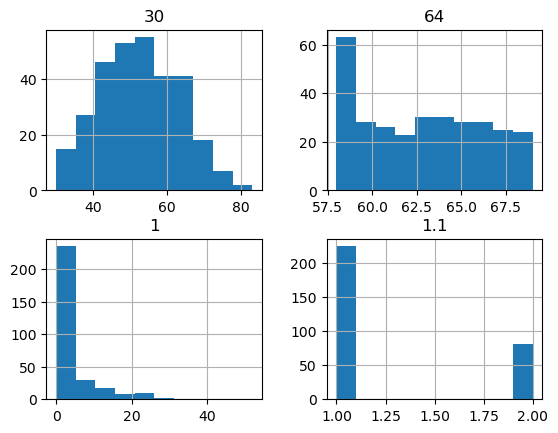

In [14]:
df.describe()
df.hist()
plt.show()

In [16]:
# summarize the class ratio of the haberman dataset
from pandas import read_csv
from collections import Counter
# define the location of the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
# define the dataset column names
columns = ['age', 'year', 'nodes', 'class']
# load the csv file as a data frame
dataframe = read_csv(url, header=None, names=columns)
# summarize the class distribution
target = dataframe['class'].values
counter = Counter(target)
for k,v in counter.items():
 per = v / len(target) * 100
 print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=225, Percentage=73.529%
Class=2, Count=81, Percentage=26.471%


In [20]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=3)

In [23]:
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)

In [26]:
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

In [27]:
# fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0, validation_data=(X_test,y_test))


In [31]:
# predict test set
y_probabilities = model.predict(X_test)
yhat = y_probabilities.argmax(axis=-1)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

5/5 [==============================] - 0s 3ms/step
Accuracy: 0.732


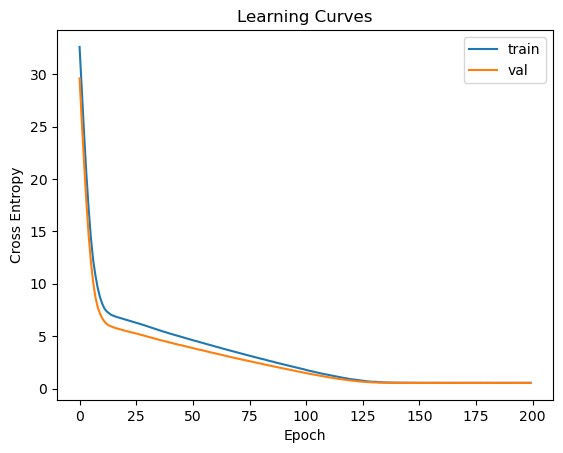

In [32]:
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

5/5 [==============================] - 0s 2ms/step
Accuracy: 0.732


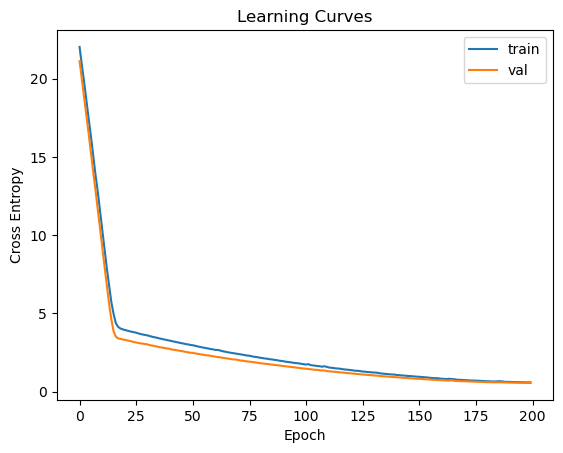

In [33]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=3)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0, validation_data=(X_test,y_test))
# predict test set
y_probabilities = model.predict(X_test)
yhat = y_probabilities.argmax(axis=-1)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [35]:
##MODEL EVALUATION USING K-FOLD

In [41]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# prepare cross validation
kfold = StratifiedKFold(10, shuffle=True, random_state=1)
# enumerate splits
scores = list()
for train_ix, test_ix in kfold.split(X, y):
 # split data
 X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
 # determine the number of input features
 n_features = X.shape[1]
 # define model
 model = Sequential()
 model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
 model.add(Dense(1, activation='sigmoid'))
 # compile the model
 model.compile(optimizer='adam', loss='binary_crossentropy')
 # fit the model
 model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0)
 # predict test set
 y_probabilities = model.predict(X_test)
 yhat = y_probabilities.argmax(axis=-1)
 # evaluate predictions
 score = accuracy_score(y_test, yhat)
 print('>%.3f' % score)
 scores.append(score)
# summarize all scores
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

1/1 [==============================] - 0s 120ms/step
>0.742
1/1 [==============================] - 0s 146ms/step
>0.742
1/1 [==============================] - 0s 164ms/step
>0.742
1/1 [==============================] - 0s 137ms/step
>0.742
1/1 [==============================] - 0s 185ms/step
>0.742
1/1 [==============================] - 0s 153ms/step
>0.710
1/1 [==============================] - 0s 150ms/step
>0.733
1/1 [==============================] - 0s 138ms/step
>0.733
1/1 [==============================] - 0s 124ms/step
>0.733
1/1 [==============================] - 0s 134ms/step
>0.733
Mean Accuracy: 0.735 (0.009)


In [42]:
# Making predictions 

In [45]:
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
le = LabelEncoder()
y = le.fit_transform(y)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
model.fit(X, y, epochs=200, batch_size=16, verbose=0)
# define a row of new data
row = [30,64,1]
# make prediction
y_probabilities = model.predict(X_test)
yhat = y_probabilities.argmax(axis=-1)
# invert transform to get label for class
yhat = le.inverse_transform(yhat)
# report prediction
print('Predicted: %s' % (yhat[0]))

1/1 [==============================] - 0s 152ms/step
Predicted: 1
